In [1]:
import pylab, random
#from test_hypothesis import *

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 18
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 18
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10


$$Var = \frac{\sum{(x_i-\mu)^2}}{n}$$

In [2]:
def variance(X):
    mean = float(sum(X))/len(X)
    diffs = 0.0
    for x in X:
        diffs += (x - mean)**2
    return diffs/len(X)

def stdDev(X):
    return variance(X)**0.5

In [3]:
def minkowskiDist(v1, v2, p):
    """Assumes v1 and v2 are equal-length arrays of numbers
       Returns Minkowski distance of order p between v1 and v2"""
    # Absolute distance 
    # p = 1 => Manhattan
    # p = 2 => Euclidean
    dist = 0.0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1.0/p)

In [4]:
class Animal(object):
    def __init__(self, name, features):
        """Assumes name a string; features a list of numbers"""
        self.name = name
        self.features = pylab.array(features)
        
    def getName(self):
        return self.name
    
    def getFeatures(self):
        return self.features
    
    def distance(self, other):
        """Assumes other an Animal
           Returns the Euclidean distance between feature vectors
              of self and other"""
        return minkowskiDist(self.getFeatures(),
                             other.getFeatures(), 2)

In [16]:
rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa constrictor', [0,1,0,1,0])
dartFrog = Animal('dart frog', [1,0,1,0,4])
animals = [rattlesnake, boa, dartFrog]

In [17]:
rattlesnake.distance(boa)

1.4142135623730951

In [24]:
animals[0].distance(animals[1])

1.4142135623730951

In [31]:

def compareAnimals(animals, precision):
    """Assumes animals is a list of animals, precision an int >= 0
       Builds a table of Euclidean distance between each animal"""
    #Get labels for columns and rows
    columnLabels = []
    for a in animals:
        columnLabels.append(a.getName())
    rowLabels = columnLabels[:] #row Labels has all of the animals names
    tableVals = []
    #Get distances between pairs of animals
    #For each row
    for a1 in animals:
        row = []
        #For each column
        for a2 in animals:
            if a1 == a2:
                row.append('--') # row will be --
            else:
                distance = a1.distance(a2) # row will have distance
                row.append(str(round(distance, precision)))
        # row will be -- for a1=a2 and for the rest it will have the distance
        tableVals.append(row)
    # print(tableVals)
    #Produce table
    table = pylab.table(rowLabels = rowLabels,
                        colLabels = columnLabels,
                        cellText = tableVals,
                        cellLoc = 'center',
                        loc = 'center',
                        colWidths = [0.2]*len(animals))
    table.scale(1, 2.5)
    pylab.title('Eucliedan Distance Between Animals')

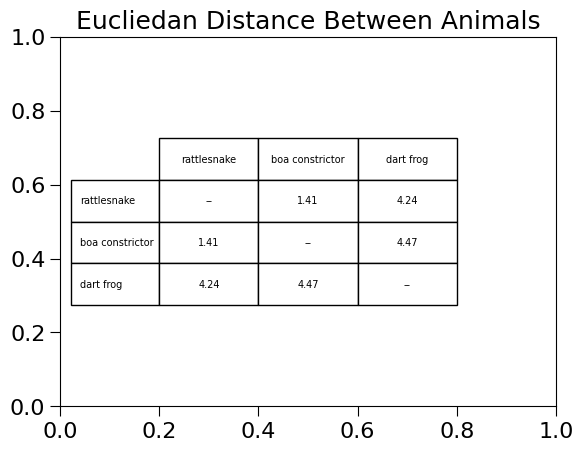

In [32]:
compareAnimals(animals, 2)